# Modeling - KNN
(Using the top 10 features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top10_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## KNN Modeling

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Instatiating the model classifier
k_clf = KNeighborsClassifier(n_neighbors=200)

# Fitting to the Data
k_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=200, p=2,
           weights='uniform')

K Nearest Neighbors
Training Accuracy: 0.4667758965956672 		 Testing Accuracy: 0.450937556890588


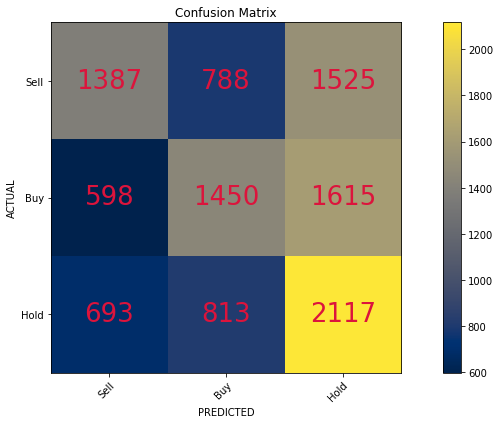

In [9]:
# Printing Results
print("K Nearest Neighbors")

# Modeling and Confusion Matrix
mod_results(k_clf, X_train, X_test, y_train, y_test)

## KNN - Results
with the scaled top 10 features

In [ ]:
# K Nearest Neighbors
# Training Accuracy: 0.4667758965956672 		 Testing Accuracy: 0.450937556890588

### RandomizedSearchCV - KNN

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
params = {"n_neighbors": [100, 200, 500],
          "weights": ['uniform', 'distance'],
          "p": [1,2]}

In [16]:
ran_search = RandomizedSearchCV(k_clf, params, n_iter=1, verbose=5)

%timeit ran_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=distance, p=1, n_neighbors=500 ..........................
[CV]  weights=distance, p=1, n_neighbors=500, score=0.4580868298898699, total=   9.9s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.0s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.4563080283997815, total=   8.8s
[CV] weights=distance, p=1, n_neighbors=500 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.8s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=500, score=0.45798816568047335, total=  11.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=distance, p=1, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=200, score=0.4598161463547829, total=   6.9s
[CV] weights=distance, p=1, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.1s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=200, score=0.4592208265064628, total=   6.4s
[CV] weights=distance, p=1, n_neighbors=200 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.5s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=200, score=0.4582612653618571, total=  11.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=uniform, p=2, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=2, n_neighbors=100, score=0.45217074724674616, total=   5.2s
[CV] weights=uniform, p=2, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=100, score=0.4507555070089204, total=   4.6s
[CV] weights=uniform, p=2, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.6s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=100, score=0.45170687300864815, total=   4.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=uniform, p=2, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=2, n_neighbors=200, score=0.45171566396650586, total=   5.0s
[CV] weights=uniform, p=2, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=200, score=0.4518478062989259, total=   6.0s
[CV] weights=uniform, p=2, n_neighbors=200 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.6s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=200, score=0.453709604005462, total=   5.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4585419131701101, total=   9.7s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4557618787547788, total=   9.3s
[CV] weights=uniform, p=1, n_neighbors=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.0s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=500, score=0.4582612653618571, total=  11.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=2, n_neighbors=100, score=0.45262583052698646, total=   4.0s
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=100, score=0.4542144547606044, total=   3.4s
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.0s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=100, score=0.4519799726900319, total=   3.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=2, n_neighbors=100, score=0.45262583052698646, total=   5.0s
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=100, score=0.4542144547606044, total=   4.9s
[CV] weights=distance, p=2, n_neighbors=100 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.6s remaining:    0.0s


[CV]  weights=distance, p=2, n_neighbors=100, score=0.4519799726900319, total=   3.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.0s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4576317466096296, total=   5.5s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.8s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.4544875295831058, total=   4.7s
[CV] weights=uniform, p=1, n_neighbors=100 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.4s remaining:    0.0s


[CV]  weights=uniform, p=1, n_neighbors=100, score=0.45598543468365954, total=   5.0s
52.8 s ± 18 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.7s finished


# Using the Parameters found with RandomSearch

In [17]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Training Score: 0.47662177342585393
Mean Testing Score: 0.4787305054918381

Best Parameter Found:


{'weights': 'uniform', 'p': 1, 'n_neighbors': 100}

K Nearest Neighbors with tuned Parameters
Training Accuracy: 0.4787305054918381 		 Testing Accuracy: 0.4574913526306208


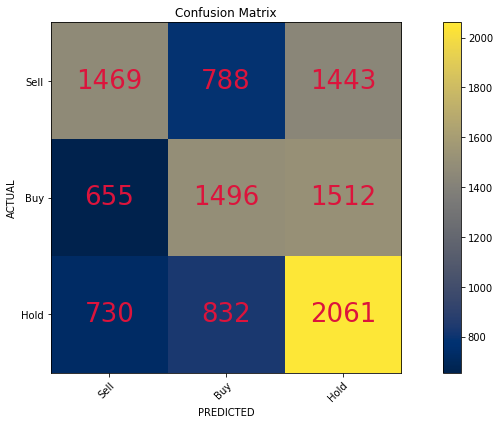

In [19]:
# Instatiating the model classifier with GridSearch's best parameters
k_clf = ran_search.best_estimator_

# Fitting the model
k_clf.fit(X_train, y_train)

# Printing Results
print("K Nearest Neighbors with tuned Parameters")
mod_results(k_clf, X_train, X_test, y_train, y_test)